In [15]:
import pandas as pd


sales_data = pd.read_csv('Sales_Data.csv')
marketing_data = pd.read_csv('Marketing_Data.csv')
feedback_data = pd.read_csv('Customer_Feedback_Data.csv')
competitor_data = pd.read_csv('Competitor_Data.csv')




In [16]:
sales_data['Units Sold'] = sales_data['Units_Sold'].fillna(sales_data['Units_Sold'].mean())  
sales_data['Revenue'] = sales_data['Revenue'].fillna(sales_data['Revenue'].median())  
sales_data['Cost_of_Goods_Sold'] = sales_data['Cost_of_Goods_Sold'].fillna(sales_data['Cost_of_Goods_Sold'].mean())  


marketing_data['Marketing_Spend'] = marketing_data['Marketing_Spend'].fillna(marketing_data['Marketing_Spend'].mean()) 
marketing_data['Campaign_Type'] = marketing_data['Campaign_Type'].fillna(marketing_data['Campaign_Type'].mode()[0])  
marketing_data['Customer_Reach'] = marketing_data['Customer_Reach'].fillna(marketing_data['Customer_Reach'].median())  


feedback_data['Customer_Rating'] = feedback_data['Customer_Rating'].fillna(feedback_data['Customer_Rating'].mean())  
feedback_data['Volume_of_Feedback'] = feedback_data['Volume_of_Feedback'].fillna(feedback_data['Volume_of_Feedback'].median()) 


competitor_data['Competitor_Price'] = competitor_data['Competitor_Price'].fillna(competitor_data['Competitor_Price'].mean()) 
competitor_data['Competitor_Market_Share'] = competitor_data['Competitor_Market_Share'].fillna(competitor_data['Competitor_Market_Share'].mean())  




In [17]:
sales_data = sales_data.drop_duplicates(subset=['Country', 'Zone', 'Product_ID', 'Date'])
marketing_data = marketing_data.drop_duplicates(subset=['Country', 'Zone', 'Date'])
feedback_data = feedback_data.drop_duplicates(subset=['Country', 'Zone', 'Product_Category', 'Date'])
competitor_data = competitor_data.drop_duplicates(subset=['Country', 'Zone', 'Competitor_Product_Category'])


sales_data['Date'] = pd.to_datetime(sales_data['Date'], format='%Y-%m-%d')
marketing_data['Date'] = pd.to_datetime(marketing_data['Date'], format='%Y-%m-%d')
feedback_data['Date'] = pd.to_datetime(feedback_data['Date'], format='%Y-%m-%d')


sales_data['Country'] = sales_data['Country'].str.title().str.strip()
marketing_data['Country'] = marketing_data['Country'].str.title().str.strip()
feedback_data['Country'] = feedback_data['Country'].str.title().str.strip()
competitor_data['Country'] = competitor_data['Country'].str.title().str.strip()


sales_data['Product_Category'] = sales_data['Product_Category'].str.strip().str.title()
feedback_data['Product_Category'] = feedback_data['Product_Category'].str.strip().str.title()


competitor_data.rename(columns={'Competitor_Product_Category': 'Product_Category'}, inplace=True)




In [18]:
merged_data = pd.merge(sales_data, marketing_data, on=['Country', 'Zone', 'Date'], how='inner')


merged_data = pd.merge(merged_data, feedback_data, on=['Country', 'Zone', 'Product_Category', 'Date'], how='inner')


final_data = pd.merge(merged_data, competitor_data, on=['Country', 'Zone', 'Product_Category'], how='left')

final_data = final_data.drop_duplicates(subset=['Country', 'Zone', 'Product_ID', 'Date'])


final_data = final_data.drop(columns=['Units Sold'])


competitor_agg = final_data.groupby(['Country', 'Zone', 'Product_Category']).agg({
    'Competitor_Price': 'mean',
    'Competitor_Market_Share': 'mean'
}).reset_index()


final_data = pd.merge(final_data, competitor_agg, on=['Country', 'Zone', 'Product_Category'], how='left')

final_data = final_data.drop(columns=['Competitor_Price_y', 'Competitor_Market_Share_y'])


final_data = final_data.rename(columns={'Competitor_Price_x': 'Competitor_Price', 'Competitor_Market_Share_x': 'Competitor_Market_Share'})


print(final_data.head())


  Country   Zone Product_ID   Product_Category  Units_Sold  Revenue  \
0   China   West        P92             Juices         439  3904.98   
1   China   West        P75             Juices         181  2099.11   
2   China   West         P7  Carbonated Drinks         187  3934.91   
3     Usa  North        P50  Carbonated Drinks         720  1883.06   
4     Usa  North        P23              Water         453  2760.57   

   Cost_of_Goods_Sold       Date  Marketing_Spend Campaign_Type  \
0             1996.17 2024-01-01          7406.05   Traditional   
1              975.75 2024-01-01          7406.05   Traditional   
2             2155.11 2024-01-01          7406.05   Traditional   
3             1962.65 2024-01-01         13104.13       Digital   
4             2358.78 2024-01-01         13104.13       Digital   

   Customer_Reach  Brand_Awareness_Score  Customer_Rating Feedback_Type  \
0           48474                      9                4      Positive   
1           48474   

In [19]:
print(final_data.isnull().sum())


Country                    0
Zone                       0
Product_ID                 0
Product_Category           0
Units_Sold                 0
Revenue                    0
Cost_of_Goods_Sold         0
Date                       0
Marketing_Spend            0
Campaign_Type              0
Customer_Reach             0
Brand_Awareness_Score      0
Customer_Rating            0
Feedback_Type              0
Volume_of_Feedback         0
Competitor_Name            0
Competitor_Price           0
Competitor_Market_Share    0
dtype: int64


In [20]:

final_data['Profit'] = final_data['Revenue'] - final_data['Cost_of_Goods_Sold']


final_data['Profit Margin'] = final_data['Profit'] / final_data['Revenue']



profitability = final_data.groupby(['Country', 'Zone', 'Product_Category']).agg({
    'Profit': 'sum',                 
    'Revenue': 'sum',               
    'Cost_of_Goods_Sold': 'sum'      
}).reset_index()


profitability['Profit Margin'] = profitability['Profit'] / profitability['Revenue']


most_profitable = profitability.sort_values(by='Profit', ascending=False)
least_profitable = profitability.sort_values(by='Profit', ascending=True)


print("Most Profitable Groups:")
print(most_profitable.head())

print("\nLeast Profitable Groups:")
print(least_profitable.head())


Most Profitable Groups:
    Country   Zone   Product_Category    Profit    Revenue  \
11   Brazil   West              Water  78092.92  175150.46   
41    India  North              Water  74362.79  160282.11   
32  Germany  South              Water  73102.71  164568.95   
56      Usa  South              Water  63722.84  132336.71   
48      Usa   East  Carbonated Drinks  63347.40  149811.12   

    Cost_of_Goods_Sold  Profit Margin  
11            97057.54       0.445862  
41            85919.32       0.463949  
32            91466.24       0.444207  
56            68613.87       0.481521  
48            86463.72       0.422848  

Least Profitable Groups:
    Country   Zone   Product_Category    Profit   Revenue  Cost_of_Goods_Sold  \
35  Germany   West              Water  19239.12  65589.69            46350.57   
58      Usa   West             Juices  19295.64  77540.16            58244.52   
25  Germany   East             Juices  19662.44  66216.27            46553.83   
44    India  

Correlation Matrix:
                       Brand_Awareness_Score  Customer_Rating  \
Brand_Awareness_Score               1.000000        -0.025894   
Customer_Rating                    -0.025894         1.000000   
Volume_of_Feedback                  0.021365        -0.012869   

                       Volume_of_Feedback  
Brand_Awareness_Score            0.021365  
Customer_Rating                 -0.012869  
Volume_of_Feedback               1.000000  


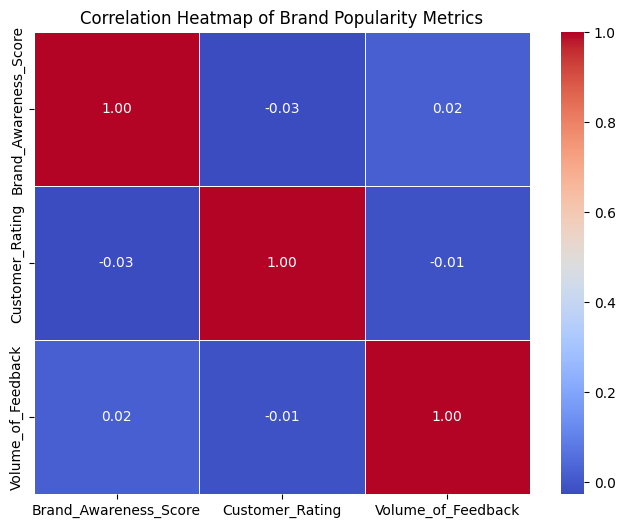

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


correlation_matrix = final_data[['Brand_Awareness_Score', 'Customer_Rating', 'Volume_of_Feedback']].corr()


print("Correlation Matrix:")
print(correlation_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Brand Popularity Metrics')
plt.show()



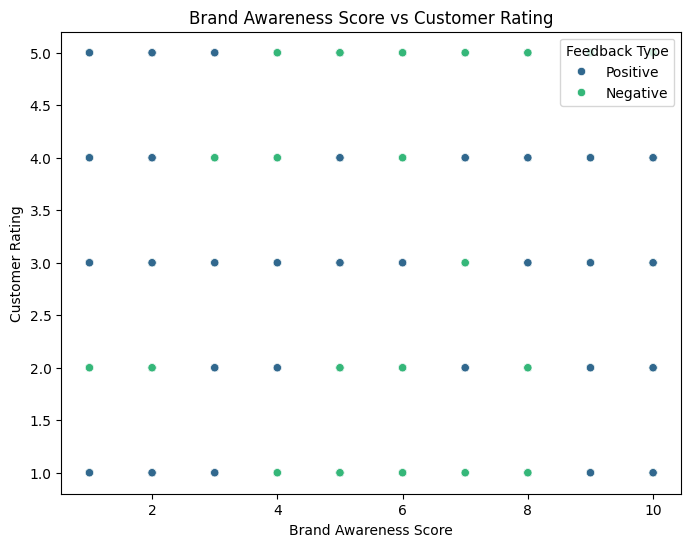

In [22]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Brand_Awareness_Score', y='Customer_Rating', data=final_data, hue='Feedback_Type', palette='viridis')
plt.title('Brand Awareness Score vs Customer Rating')
plt.xlabel('Brand Awareness Score')
plt.ylabel('Customer Rating')
plt.legend(title='Feedback Type')
plt.show()



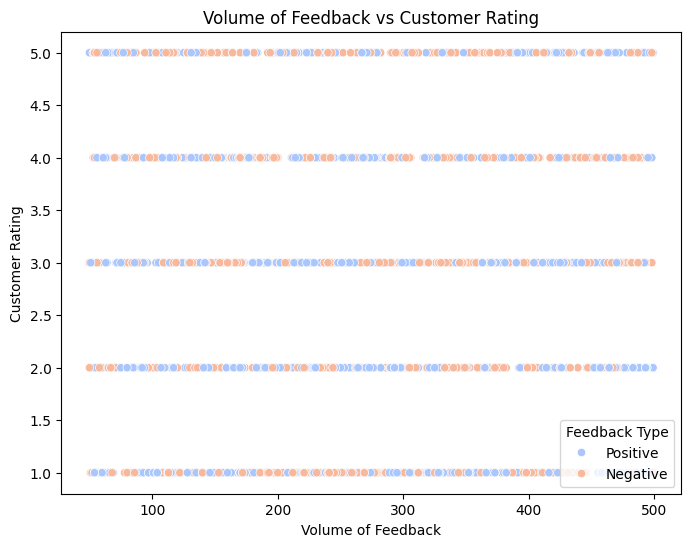

In [23]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Volume_of_Feedback', y='Customer_Rating', data=final_data, hue='Feedback_Type', palette='coolwarm')
plt.title('Volume of Feedback vs Customer Rating')
plt.xlabel('Volume of Feedback')
plt.ylabel('Customer Rating')
plt.legend(title='Feedback Type')
plt.show()



In [24]:

if correlation_matrix.loc['Brand_Awareness_Score', 'Customer_Rating'] > 0.5:
    print("Strong positive correlation between Brand Awareness and Customer Rating.")
else:
    print("Weak or no strong correlation between Brand Awareness and Customer Rating.")

if correlation_matrix.loc['Volume_of_Feedback', 'Customer_Rating'] > 0.5:
    print("Strong positive correlation between Volume of Feedback and Customer Rating.")
else:
    print("Weak or no strong correlation between Volume of Feedback and Customer Rating.")


Weak or no strong correlation between Brand Awareness and Customer Rating.
Weak or no strong correlation between Volume of Feedback and Customer Rating.


In [25]:

competitor_analysis = final_data.groupby(['Country', 'Zone', 'Competitor_Name' ,'Product_Category']).agg({
    'Competitor_Market_Share': 'mean',
    'Competitor_Price': 'mean',
   
    'Revenue': 'sum',
    'Cost_of_Goods_Sold': 'sum',
    'Profit': 'sum'
}).reset_index()


competitor_analysis['GB_Market_Share'] = (competitor_analysis['Revenue'] / competitor_analysis['Revenue'].sum()) * 100

competitor_analysis['Price_Difference'] = competitor_analysis['Competitor_Price'] - (
    competitor_analysis['Revenue'] / final_data.groupby(['Country', 'Zone', 'Product_Category'])['Units_Sold'].sum().values
)


competitor_analysis['Profit Margin'] = competitor_analysis['Profit'] / competitor_analysis['Revenue']


competitor_analysis = competitor_analysis.sort_values(by='Competitor_Market_Share', ascending=False)


print("Competitive Positioning Analysis:")
print(competitor_analysis.head(10))


Competitive Positioning Analysis:
    Country   Zone Competitor_Name   Product_Category  \
23    China   West    Competitor_C              Water   
31  Germany  South    Competitor_A             Juices   
17    China  North    Competitor_C             Juices   
55      Usa  South    Competitor_B             Juices   
27  Germany  North    Competitor_A              Water   
49      Usa   East    Competitor_B  Carbonated Drinks   
58      Usa   West    Competitor_C  Carbonated Drinks   
45    India   West    Competitor_C  Carbonated Drinks   
39    India  North    Competitor_A              Water   
9    Brazil   West    Competitor_A  Carbonated Drinks   

    Competitor_Market_Share  Competitor_Price    Revenue  Cost_of_Goods_Sold  \
23                    49.34              6.74  106291.71            66060.87   
31                    48.32              8.28   88682.39            52867.01   
17                    48.30              5.43   77741.25            47001.14   
55                

C:\Users\2003v\AppData\Local\Temp\ipykernel_25480\473583260.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_zone.index, y=profit_by_zone.values, palette='viridis')


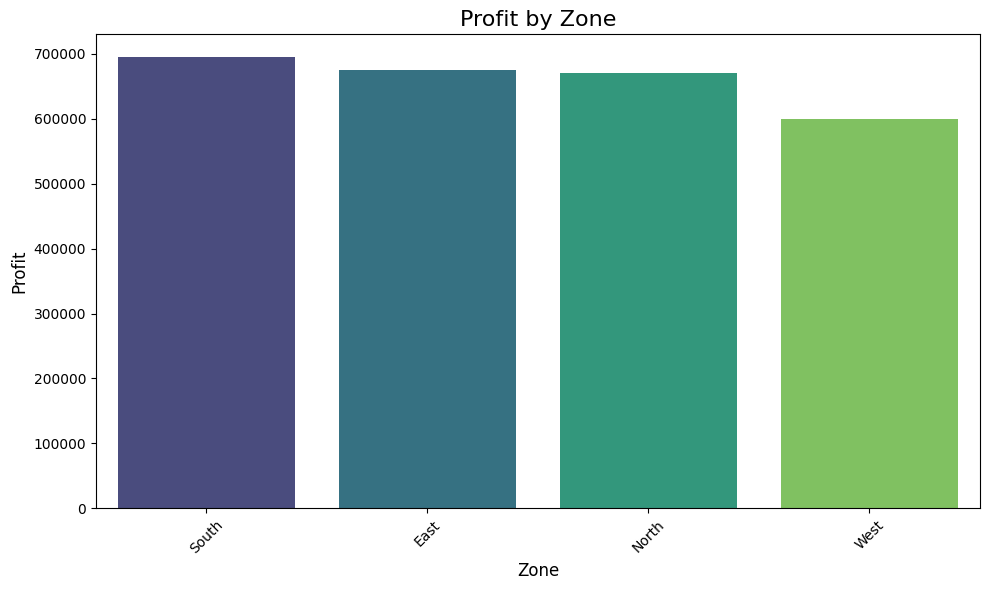

C:\Users\2003v\AppData\Local\Temp\ipykernel_25480\473583260.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profit_by_category.index, y=profit_by_category.values, palette='coolwarm')


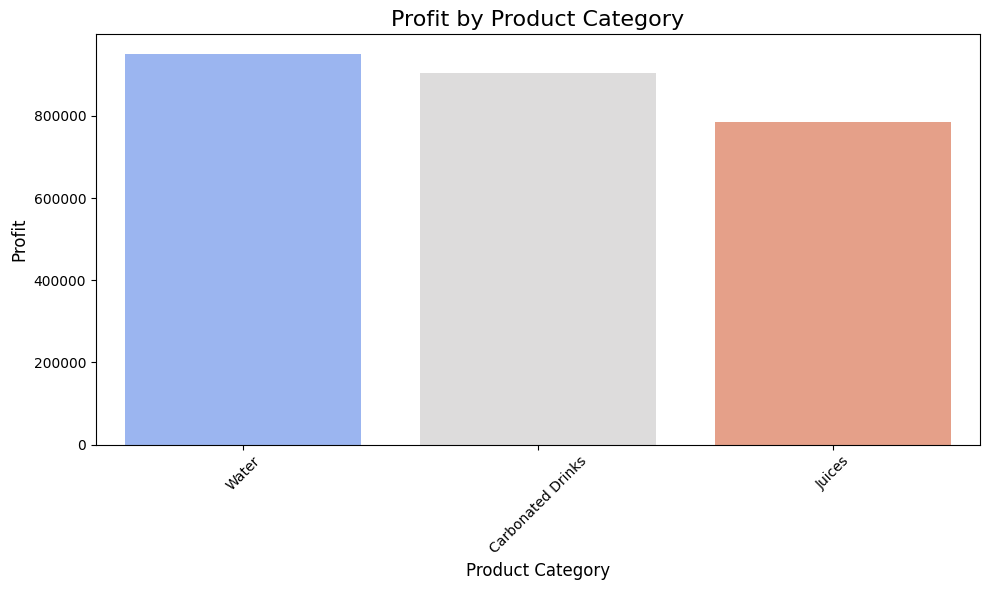

In [26]:

profit_by_zone = final_data.groupby('Zone')['Profit'].sum().sort_values(ascending=False)
profit_by_category = final_data.groupby('Product_Category')['Profit'].sum().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x=profit_by_zone.index, y=profit_by_zone.values, palette='viridis')
plt.title('Profit by Zone', fontsize=16)
plt.ylabel('Profit', fontsize=12)
plt.xlabel('Zone', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x=profit_by_category.index, y=profit_by_category.values, palette='coolwarm')
plt.title('Profit by Product Category', fontsize=16)
plt.ylabel('Profit', fontsize=12)
plt.xlabel('Product Category', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

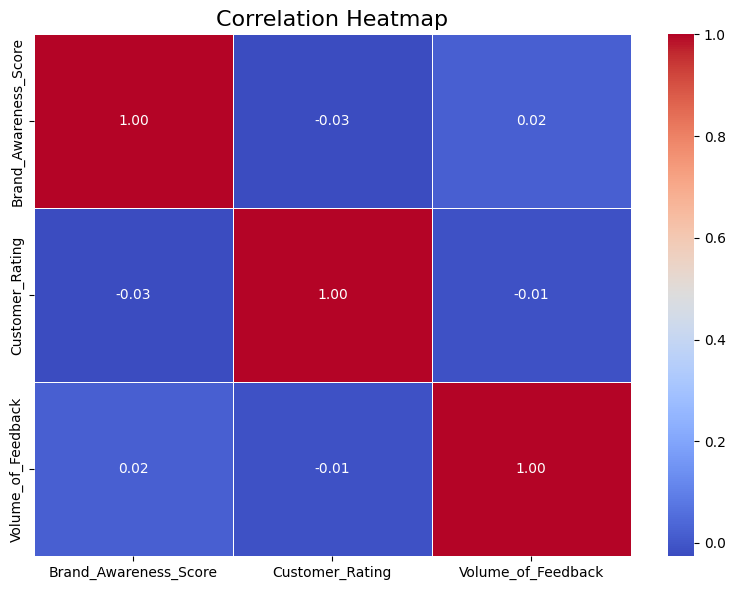

In [27]:

correlation_matrix = final_data[['Brand_Awareness_Score', 'Customer_Rating', 'Volume_of_Feedback']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()

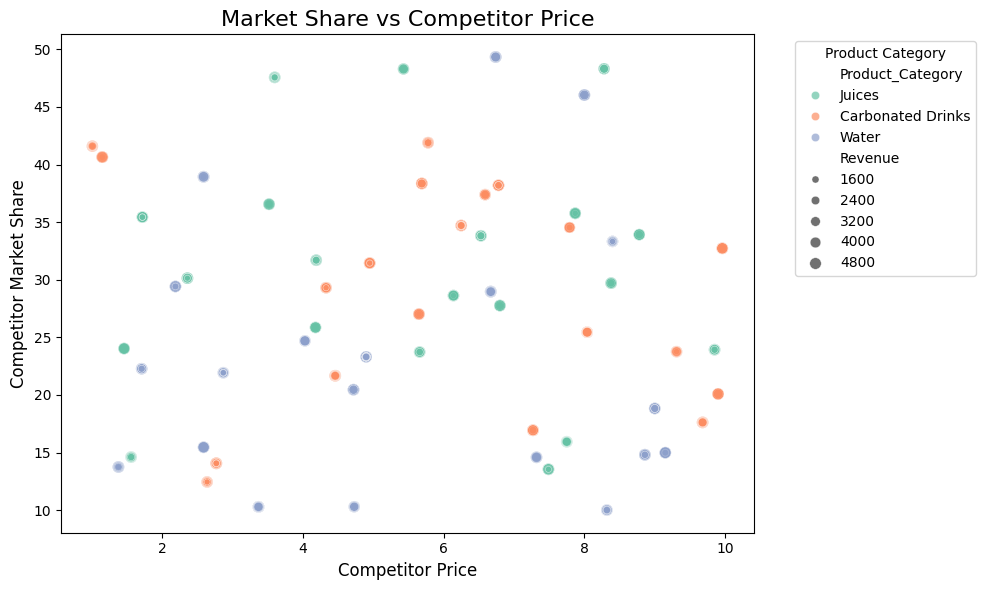

In [28]:

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=final_data,
    x='Competitor_Price',
    y='Competitor_Market_Share',
    hue='Product_Category',
    size='Revenue',
    palette='Set2',
    alpha=0.7
)
plt.title('Market Share vs Competitor Price', fontsize=16)
plt.xlabel('Competitor Price', fontsize=12)
plt.ylabel('Competitor Market Share', fontsize=12)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()